# <div style="background-color: cyan; text-align: center;"><font color=red>Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os,pathlib, json
import pandas as pd
from IPython import display

# <div style="background-color: cyan; text-align: center;"><font color=red>Importing model and labels

In [2]:
model = tf.keras.models.load_model('checkpoint/weightings.h5')
with open(os.path.join('checkpoint/','label_to_index.txt'), 'r')as file:
    label_names = json.loads(file.read())

In [3]:
label_names = {y:x for x,y in label_names.items()}

#  <div style="background-color: cyan; text-align: center;"><font color=red>Loading and Preprocessing images

In [4]:
def preprocess_img(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.crop_to_bounding_box(image, int(image.shape[0]*0.2), 0, int(image.shape[0]*0.6), int(image.shape[1]))
    image = tf.image.resize(image, [224, 224])
    image /= 255.0
    return image

In [5]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_img(image)

# <div style="background-color: cyan; text-align: center;"><font color=red>Loading Test images

In [6]:
testing_rt = pathlib.Path('Test_images/')
all_testing_paths = [str(path) for path in list(testing_rt.glob('*/*'))]

# <div style="background-color: cyan; text-align: center;"><font color=red>Predicting and Displaying images

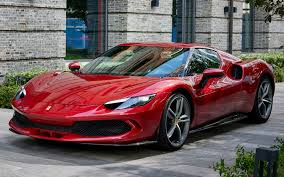

1/1 [==============================] - 0s 77ms/step
Supercar detected : Ferrari 296 GTB


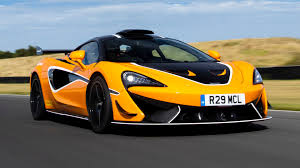

1/1 [==============================] - 0s 83ms/step
Supercar detected : McLaren 620R


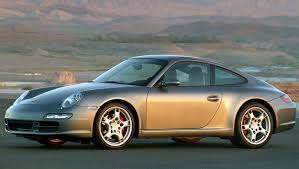

1/1 [==============================] - 0s 90ms/step
Supercar detected : Porsche Carrera 4


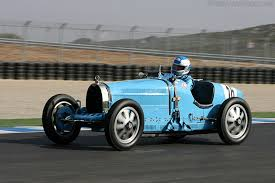

1/1 [==============================] - 0s 78ms/step
Supercar detected : Bugatti Type 35


In [7]:
pred_list = []
for i in range(len(all_testing_paths)):
    img = load_and_preprocess_image(all_testing_paths[i])
    display.display(display.Image(all_testing_paths[i]))
    img = np.reshape(img, [1, 224, 224, 3])
    pred_list.append(label_names[np.argmax(model.predict(img))])
    test = enumerate(model.predict(img).tolist()[0])
    print(f'Supercar detected : {pred_list[-1]}')

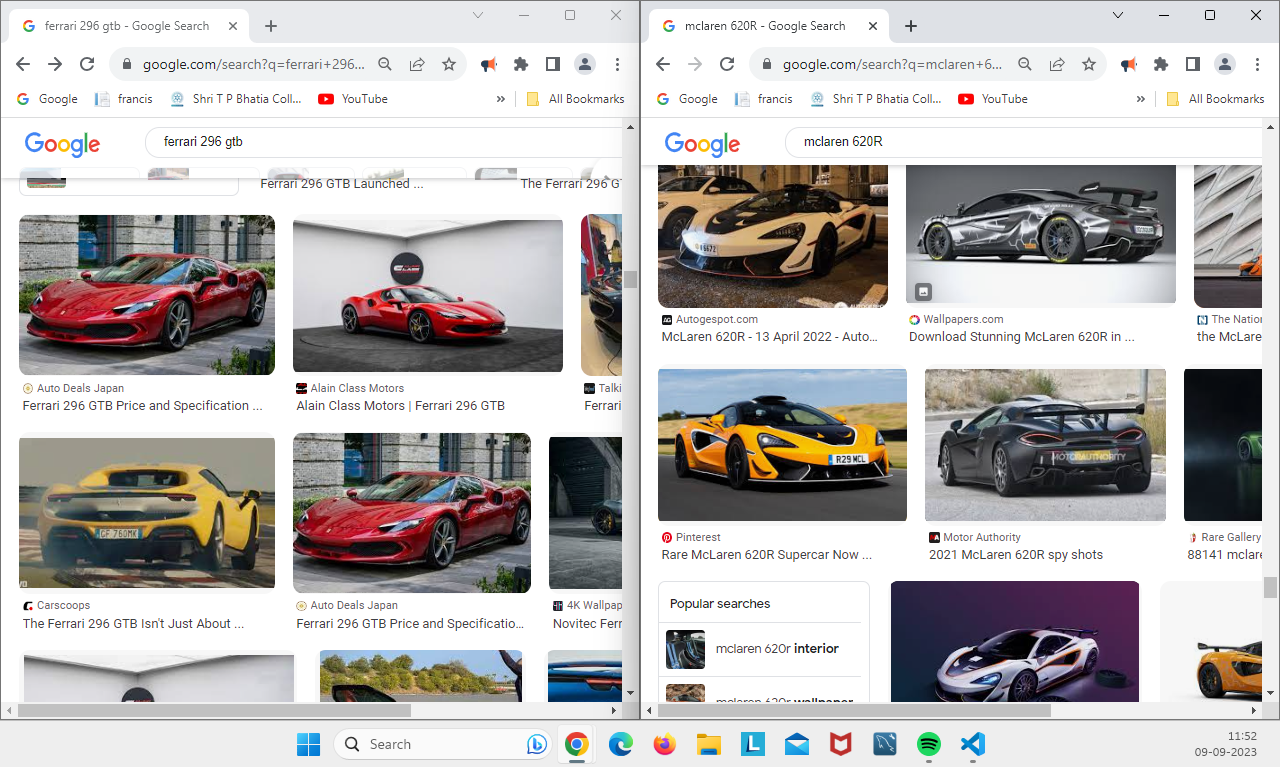

In [8]:
display.Image(filename='C:/Users/7XIN/Desktop/N2/AI/DL/SuperCar Image Classification/image_search_.png')

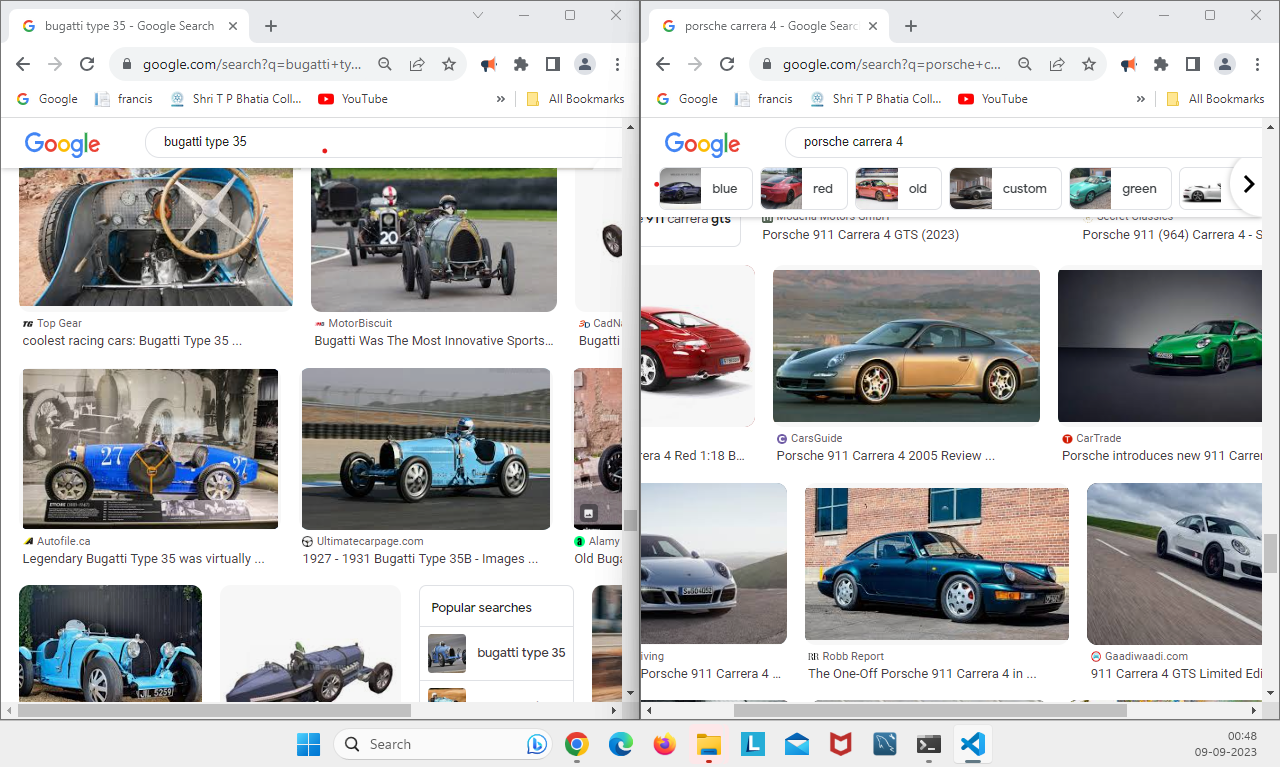

In [9]:
display.Image(filename='C:/Users/7XIN/Desktop/N2/AI/DL/SuperCar Image Classification/image_search.png')

# <div style="background-color: cyan; text-align: center;"><font color=red>Saving, Loading and Testing Pipeline

In [10]:
import joblib
#creating multiple functions containing all the steps used for predicting new images and storing in predictor.py
from predictor import predictor

In [11]:
#creating a pipeline of the functions

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[('prediction',
                            FunctionTransformer(func=predictor, validate=False))])

#saving the pipeline
joblib.dump(pipeline, 'pred_model.pkl')

['pred_model.pkl']

In [12]:
#loading the pipeline
import joblib
loaded_pipeline = joblib.load('pred_model.pkl')

#testing the pipeline
image_path = 'C://Users//7XIN//Desktop//N2//AI//DL//SuperCar Image Classification//Test_images//test1//img_1.jpg'
prediction = loaded_pipeline.transform(image_path)
prediction

1/1 [==============================] - 2s 2s/step


'Ferrari 296 GTB'